**Import necessary libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Big Data - Final Project").getOrCreate()
from pyspark.sql import SparkSession, Window, Row                   
from pyspark.sql import functions as F                              
from pyspark.sql.functions import col, isnan, when, count           
from pyspark.sql.functions import *                                 
from pyspark.sql.types import *                                     
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     
%matplotlib inline                                                  
import seaborn as sns                                               
from handyspark import *                                            
import numpy as np                                                  
import pandas as pd                                               
#-------------------------------------------------------------------------------------------------------------------------------
from pyspark.ml.feature import VectorAssembler                      
#-------------------------------------------------------------------------------------------------------------------------------
# pip install handyspark
from handyspark import *
from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder
from pyspark.sql.functions import mean, col
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
#pip install pyspark

In [ ]:
#pip install handyspark

**Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/TEAM LAG_VERSION FAKE/BIG DATA/Final"

Mounted at /content/gdrive


In [ ]:
#Loading in the data, printing the schema, and showing the top 10 rows
df = spark.read.csv(r'gdrive/My Drive/TEAM LAG_VERSION FAKE/BIG DATA/Final/data.csv', header = True, 
                               inferSchema = True)
df.show(10)

+--------------------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|             \tEmail|             Address|          Avatar|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet|      12.66|          39.58|                4.08|             587.95|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen|      11.11|          37.27|                2.66|              392.2|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|      11.33|          37.11|                 4.1|             487.55|
|riverarebecca@gma...|1414 David Throug...|     SaddleBrown|      13.72|          36.72|                3.12|             581.85|
|mstephens@davidso...|14023 Rodriguez P...|MediumAquaMarine|       12.8|          37.54|  

In [ ]:
current_columns = df.columns
new_columns = list(map(lambda item : item.replace("\t",""),current_columns))
new_columns = list(map(lambda item : item.replace("        ",""),new_columns))

from functools import reduce
df = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df)
df.show(n=10)

+--------------------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet|      12.66|          39.58|                4.08|             587.95|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen|      11.11|          37.27|                2.66|              392.2|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|      11.33|          37.11|                 4.1|             487.55|
|riverarebecca@gma...|1414 David Throug...|     SaddleBrown|      13.72|          36.72|                3.12|             581.85|
|mstephens@davidso...|14023 Rodriguez P...|MediumAquaMarine|       12.8|          37.54|  

In [ ]:
# Getting a description of the dataset, similar to pandas df.describe()
df.describe().show()

+-------+-----------------+--------------------+-----------+------------------+------------------+--------------------+-------------------+
|summary|            Email|             Address|     Avatar|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------------+--------------------+-----------+------------------+------------------+--------------------+-------------------+
|  count|              500|                 500|        500|               500|               500|                 500|                500|
|   mean|             null|                null|       null|12.052619999999996| 37.06048000000002|  3.5333599999999983| 499.31424000000004|
| stddev|             null|                null|       null|0.9944179552579887|1.0105553987921965|  0.9992604030512829|  79.31476398498823|
|    min|aaron04@yahoo.com|0001 Mack MillNor...|  AliceBlue|              8.51|             33.91|                0.27|             256.67|
|    max|zscott@wrig

In [ ]:
# get the schema information of the dataset:
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [ ]:
# Checking type of dataframe
print(type(df))

# Displaying dtypes of columns
df.dtypes

<class 'pyspark.sql.dataframe.DataFrame'>


[('Email', 'string'),
 ('Address', 'string'),
 ('Avatar', 'string'),
 ('Time on App', 'double'),
 ('Time on Website', 'double'),
 ('Length of Membership', 'double'),
 ('Yearly Amount Spent', 'double')]

In [ ]:
data = df.toPandas()
print('Type of dataframe:', type(data))
print('Type of columns:', data.dtypes)
print('Shape of the dataframe (Pandas version): ', data.shape)
data.head()

Type of dataframe: <class 'pandas.core.frame.DataFrame'>
Type of columns: Email                    object
Address                  object
Avatar                   object
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object
Shape of the dataframe (Pandas version):  (500, 7)


,Email,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


**Data Preprocessing**

In [ ]:
# Creating a dataframe to check null value counts
null_df = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '') | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])

# Displaying the null value counts dataframe
null_df.show()

+-----+-------+------+-----------+---------------+--------------------+-------------------+
|Email|Address|Avatar|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+-----+-------+------+-----------+---------------+--------------------+-------------------+
|    0|      0|     0|          0|              0|                   0|                  0|
+-----+-------+------+-----------+---------------+--------------------+-------------------+



There are no null values in the dataframe.

**Exploratory Data Analysis**

**Univariate Analysis**

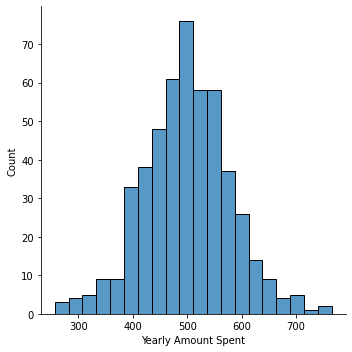

In [ ]:
sample_df = df.select(['Yearly Amount Spent'])
pandas_df = sample_df.toPandas()
sns.displot(pandas_df,x="Yearly Amount Spent")

Observation:

- We can see it closely looks like a symmetrical distribution.
- Max Yearly Amount Spent can go till 765.
- Majority of the customer have Yearly Amount Spent listings above 400 dollars and under 600 dollars.

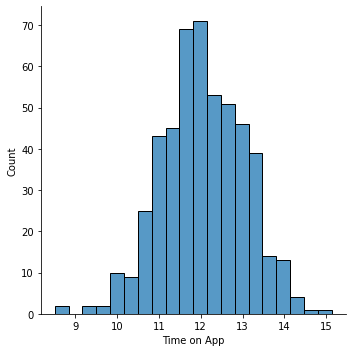

In [ ]:
sample_df1 = df.select(['Time on App'])
pandas_df1 = sample_df1.toPandas()
sns.displot(pandas_df1,x="Time on App")

Observation:

- We can see it closely looks like a symmetrical distribution.
- Max Time on App can go till 16 hours.
- Majority of the customer have Time on App listings above 11 hours and under 14 hours.

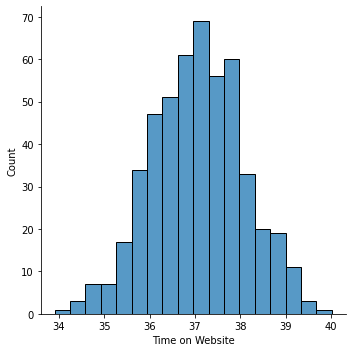

In [ ]:
sample_df2 = df.select(['Time on Website'])
pandas_df2 = sample_df2.toPandas()
sns.displot(pandas_df2,x="Time on Website")

Observation:

- We can see it closely looks like a symmetrical distribution.
- Max Time on Website can go till 41 hours.
- Majority of the customer have Time on Website listings above 35 hours and under 39 hours.

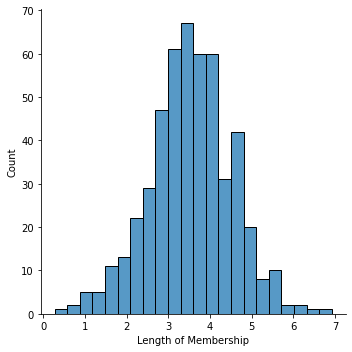

In [ ]:
sample_df3 = df.select(['Length of Membership'])
pandas_df3 = sample_df3.toPandas()
sns.displot(pandas_df3,x="Length of Membership")

Observation:

We can see it closely looks like a symmetrical distribution.
Max Length of Membership can go till 7 months.
Majority of the customer have Length of Membership above 2 months and under 5 months.

In [ ]:
from pyspark.sql.functions import sum, col, desc
df.groupBy("Avatar") \
  .agg(sum("Yearly Amount Spent").alias("sum_yearly_amount_spent")) \
  .sort(desc("sum_yearly_amount_spent")) \
  .show()

+-------------+-----------------------+
|       Avatar|sum_yearly_amount_spent|
+-------------+-----------------------+
|  GreenYellow|                3526.17|
|    SlateBlue|                 3507.3|
|         Cyan|                3456.13|
|    CadetBlue|                3364.71|
|        Wheat|                3307.63|
|DarkGoldenRod|     3290.7900000000004|
|    Turquoise|                3241.51|
|     Moccasin|                3217.74|
|   DarkViolet|     3214.2400000000002|
|         Teal|     3206.7799999999997|
|       Orange|                3147.75|
|     DeepPink|                3140.26|
|   BlueViolet|                 3105.5|
|    OliveDrab|                3089.37|
|    PeachPuff|                3088.33|
|         Aqua|                3015.86|
| LightSkyBlue|     3014.9900000000002|
|       Bisque|     2905.3900000000003|
|       Tomato|                2839.98|
|   SandyBrown|                2826.59|
+-------------+-----------------------+
only showing top 20 rows



**Multivariate Analysis**

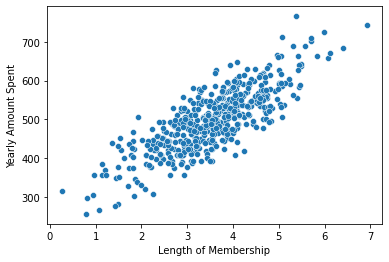

In [ ]:
sample_df4 = df.select(['Length of Membership','Yearly Amount Spent'])
pandas_df4 = sample_df4.toPandas()
sns.scatterplot(data=pandas_df4, x="Length of Membership", y="Yearly Amount Spent")

We observe a strong linear relationship between Time on Website and Length of Membership.

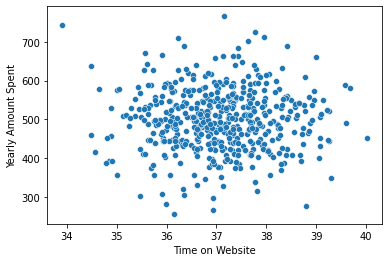

In [ ]:
sample_df5 = df.select(['Time on Website','Yearly Amount Spent'])
pandas_df5 = sample_df5.toPandas()
sns.scatterplot(data=pandas_df5, x="Time on Website", y="Yearly Amount Spent")

We don't observe any linear relationship between Time on Website and Yearly Amount Spent.

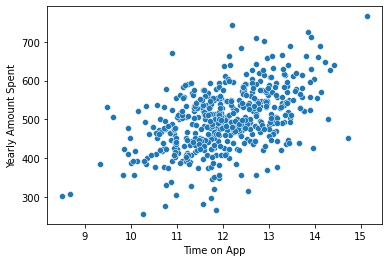

In [ ]:
sample_df6 = df.select(['Time on App','Yearly Amount Spent'])
pandas_df6 = sample_df6.toPandas()
sns.scatterplot(data=pandas_df6, x="Time on App", y="Yearly Amount Spent")

We observe a slight linear relationship between Time on Website and Yearly Amount Spent.

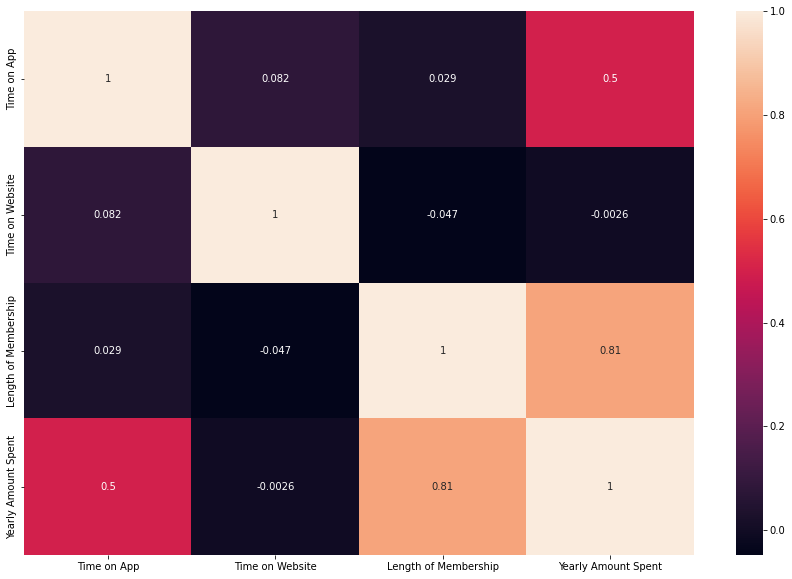

In [ ]:
# Plot a heatmap to check for correlations between features
data = df.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observation:

- **Yearly Amount Spent** is highly correlated with **Length of Membership** and **Time on App**.

- We can see **Yearly Amount Spent** is slightly related to **Time on Website** but is not influenced as much.

- **Time on Website** and **Length of Membership** are inversely correlated, indicating that some customers who have a longer length of membership usually spend less time on the website.

**Clustering Model**

In [ ]:
assembler = VectorAssembler(inputCols = ['Time on App', 'Time on Website', 'Length of Membership','Yearly Amount Spent'], 
                            outputCol = 'features')
transformed_df = assembler.transform(df)
transformed_df = transformed_df.select('Address', 'features')

transformed_df.show(5)

+--------------------+--------------------+
|             Address|            features|
+--------------------+--------------------+
|835 Frank TunnelW...|[12.66,39.58,4.08...|
|4547 Archer Commo...|[11.11,37.27,2.66...|
|24645 Valerie Uni...|[11.33,37.11,4.1,...|
|1414 David Throug...|[13.72,36.72,3.12...|
|14023 Rodriguez P...|[12.8,37.54,4.45,...|
+--------------------+--------------------+
only showing top 5 rows



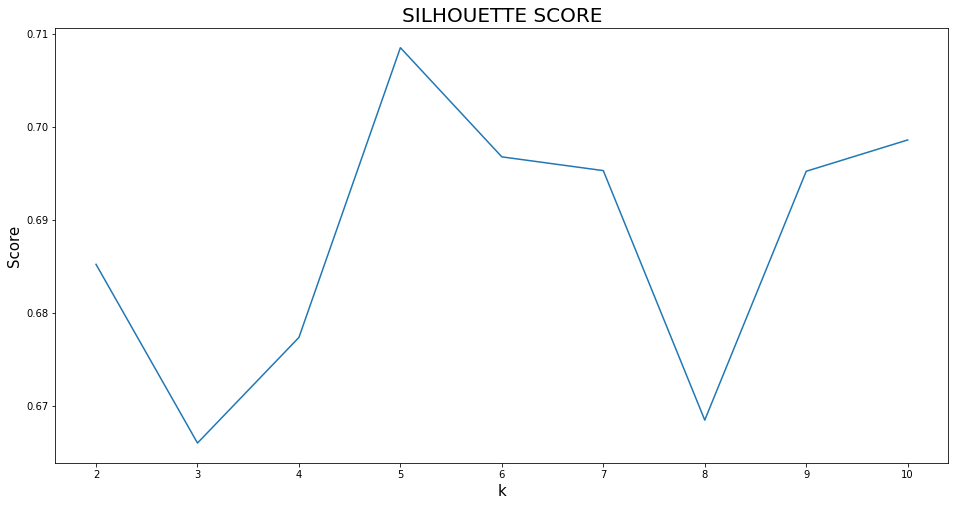

In [ ]:
k_list = []
score = []
# Apply k-means with different value of k
for k in range(2, 11):
    k_list.append(k)
    kmeans = KMeans(k=k, featuresCol='features')
    kmeans_model = kmeans.fit(transformed_df)
    evaluator = ClusteringEvaluator(metricName='silhouette', distanceMeasure='squaredEuclidean')
    predictions = kmeans_model.transform(transformed_df)
    score.append(evaluator.evaluate(predictions))

# Plot the silhouette score
fig, ax = plt.subplots(1, 1, figsize =(16, 8))

ax.plot(k_list, score)
ax.set_xlabel('k',fontsize=15)
ax.set_ylabel('Score',fontsize=15)
ax.set_title('SILHOUETTE SCORE', fontsize=20);

The optimal value of k (number of clusters) is 5 because k=5 has highest Sihouette score.

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(k=5, featuresCol='features')
kmeans_model = kmeans.fit(transformed_df)
predictions = kmeans_model.transform(transformed_df)
cluster_centers = kmeans_model.clusterCenters()
for i in range(0,5):
  print(f'Center point of cluster {i+1}: ', cluster_centers[i])

Center point of cluster 1:  [ 11.52239669  37.1092562    2.75826446 420.8653719 ]
Center point of cluster 2:  [ 12.36703448  37.07413793   4.11868966 557.63448276]
Center point of cluster 3:  [ 11.99523529  37.05952941   3.48047059 491.08811765]
Center point of cluster 4:  [ 13.15785714  36.97928571   5.01452381 649.00595238]
Center point of cluster 5:  [ 11.23        36.86454545   1.51954545 324.19      ]


**Visualize the result**

In [ ]:
KMeans_=KMeans(featuresCol='features', k=5) 
KMeans_Model=KMeans_.fit(transformed_df)
KMeans_Assignments=KMeans_Model.transform(transformed_df)
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(transformed_df)
pca_transformed = pca_model.transform(transformed_df)
import numpy as np
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())
cluster_assignment = np.array(KMeans_Assignments.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

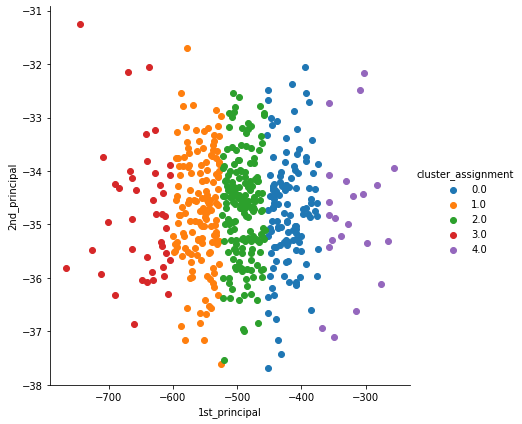

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca_data = np.hstack((x_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

The customers are divided into 5 clusters represented by 5 different colors.

In [ ]:
result = predictions.select('Address', 'prediction')
result = result.join(df, on='Address', how='inner')
result.show()

+--------------------+----------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|             Address|prediction|               Email|          Avatar|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+----------+--------------------+----------------+-----------+---------------+--------------------+-------------------+
|835 Frank TunnelW...|         1|mstephenson@ferna...|          Violet|      12.66|          39.58|                4.08|             587.95|
|4547 Archer Commo...|         0|   hduke@hotmail.com|       DarkGreen|      11.11|          37.27|                2.66|              392.2|
|24645 Valerie Uni...|         2|    pallen@yahoo.com|          Bisque|      11.33|          37.11|                 4.1|             487.55|
|1414 David Throug...|         1|riverarebecca@gma...|     SaddleBrown|      13.72|          36.72|                3.12|             581.85|
|14023 Rodrig

[Text(0.5, 1.0, 'Yearly Amount Spent by Cluster')]

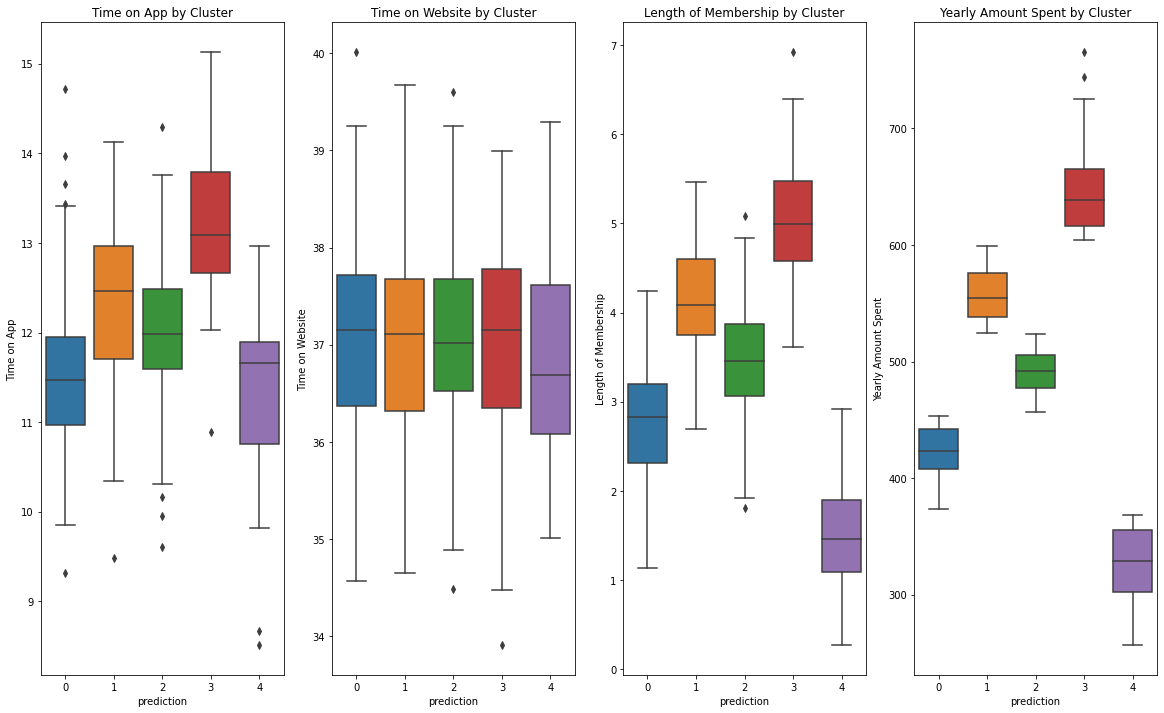

In [ ]:
result = result.toPandas()
fig, ax = plt.subplots(1, 4, figsize=(20, 12))
sns.boxplot(x='prediction', y='Time on App', data=result, ax=ax[0]).set(title = 'Time on App by Cluster')
sns.boxplot(x='prediction', y='Time on Website', data=result, ax=ax[1]).set(title = 'Time on Website by Cluster')
sns.boxplot(x='prediction', y='Length of Membership', data=result,  ax=ax[2]).set(title = 'Length of Membership by Cluster')
sns.boxplot(x='prediction', y='Yearly Amount Spent', data=result, ax=ax[3]).set(title = 'Yearly Amount Spent by Cluster')